<a href="https://colab.research.google.com/github/Chaitanyapp12/Data-Science/blob/main/Parkinson's_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   1000 non-null   float64
 1   feature_1   1000 non-null   float64
 2   feature_2   1000 non-null   float64
 3   feature_3   1000 non-null   float64
 4   feature_4   1000 non-null   float64
 5   feature_5   1000 non-null   float64
 6   feature_6   1000 non-null   float64
 7   feature_7   1000 non-null   float64
 8   feature_8   1000 non-null   float64
 9   feature_9   1000 non-null   float64
 10  feature_10  1000 non-null   float64
 11  feature_11  1000 non-null   float64
 12  feature_12  1000 non-null   float64
 13  feature_13  1000 non-null   float64
 14  feature_14  1000 non-null   float64
 15  feature_15  1000 non-null   float64
 16  feature_16  1000 non-null   float64
 17  feature_17  1000 non-null   float64
 18  feature_18  1000 non-null   float64
 19  feature_19  1000 non-null   

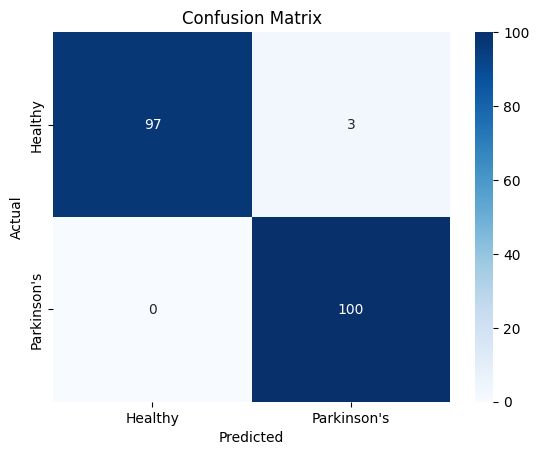

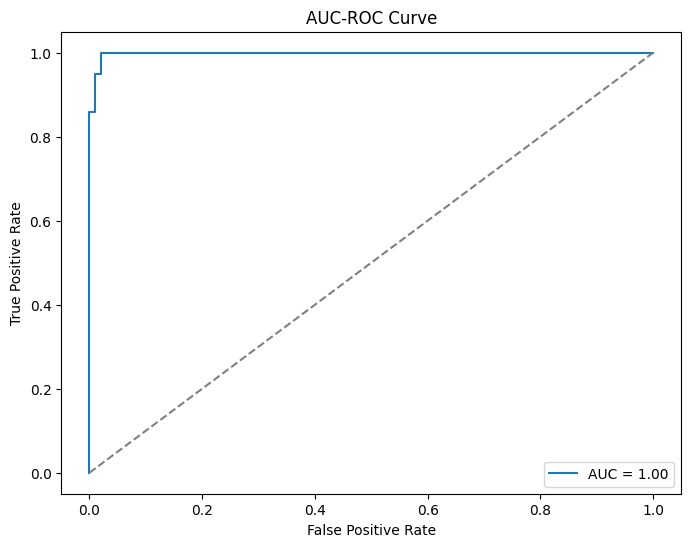

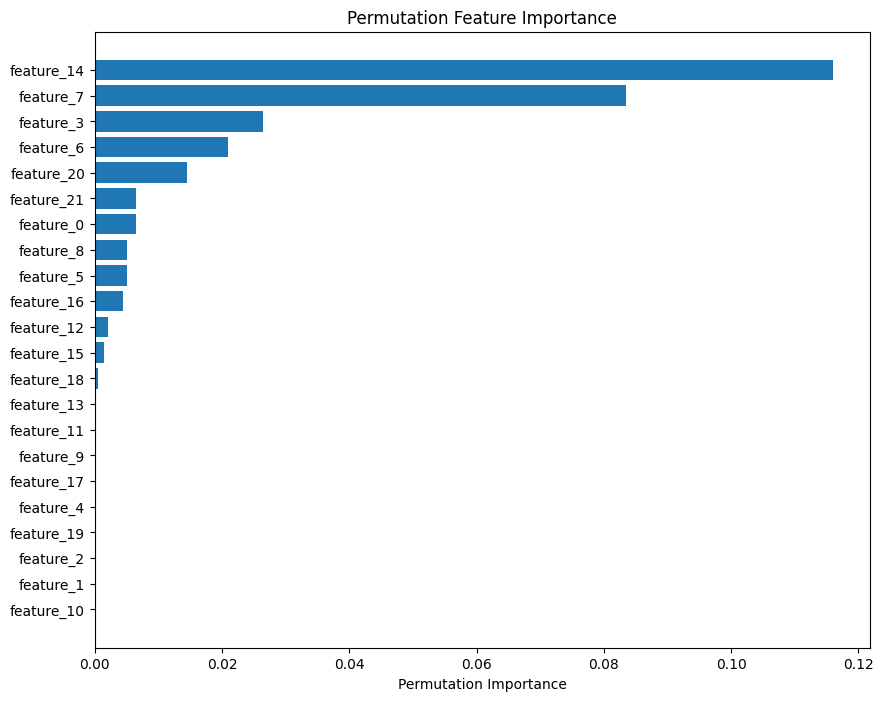

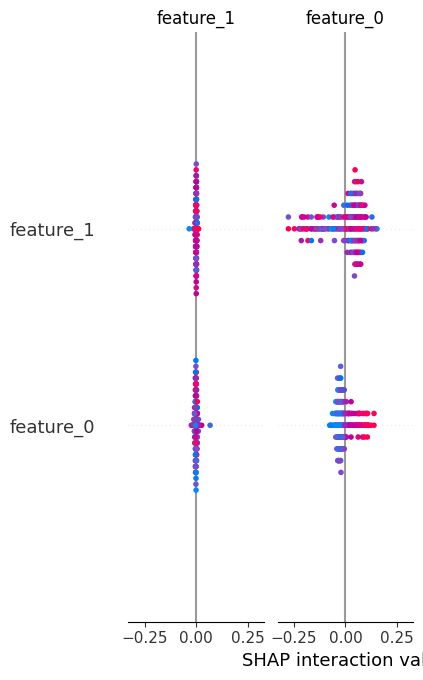

Model saved as parkinsons_model.pkl


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import shap

# Step 1: Generate Synthetic Dataset
from sklearn.datasets import make_classification

# Creating a synthetic dataset with 22 features (to mimic Parkinson's dataset)
X, y = make_classification(n_samples=1000, n_features=22, n_informative=10, n_redundant=5,
                           n_classes=2, random_state=42, class_sep=1.5)

# Convert to DataFrame for easier handling
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(22)])
data['status'] = y  # Adding the target column

# Inspect the dataset
print(data.info())
print(data.describe())

# Step 2: Data Preprocessing
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Feature Selection
X = data.drop(['status'], axis=1)  # Target column is 'status'
y = data['status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Model Building
# Using Random Forest Classifier with default parameters
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Parkinson\'s'], yticklabels=['Healthy', 'Parkinson\'s'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# AUC-ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

# Step 5: Feature Importance (Permutation and SHAP)
# Permutation Importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()

# SHAP Values
explainer = shap.TreeExplainer(rf)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values.values, X_test, feature_names=X.columns)

# Step 6: Save the Model (for deployment)
import joblib
joblib.dump(rf, 'parkinsons_model.pkl')
print("Model saved as parkinsons_model.pkl")
